### Approach
1.This code considers only "Short description" column to create word embeddings. There are 8 empty entries for this column, for which text is pulled in from "Description" column. Second Approach, We can concatanate both Short description and Descrition columns too.
2. Used 200d word embeddings from Glove glove.6B.200d.txt. We can use 300d as well. Whichever we use we should keep it in our common repo
3. The data is highly skewed
4.  Have used Keras Tokenizer, it has inbuilt filter, tolower and punctuation removal.
5. Have used a simple model for now LSTM units, will try out other models and hyperparameters later...

In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_excel("Tickets.xlsx")

In [3]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
data.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [8]:
data["Assignment group"].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
          ... 
GRP_36      15
GRP_44      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_46       6
GRP_49       6
GRP_59       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_56       3
GRP_63       3
GRP_58       3
GRP_38       3
GRP_68       3
GRP_69       2
GRP_54       2
GRP_57       2
GRP_71       2
GRP_72       2
GRP_35       1
GRP_61       1
GRP_64       1
GRP_73       1
GRP_70       1
GRP_67       1
Name: Assignment group, Length: 74, dtype: int64

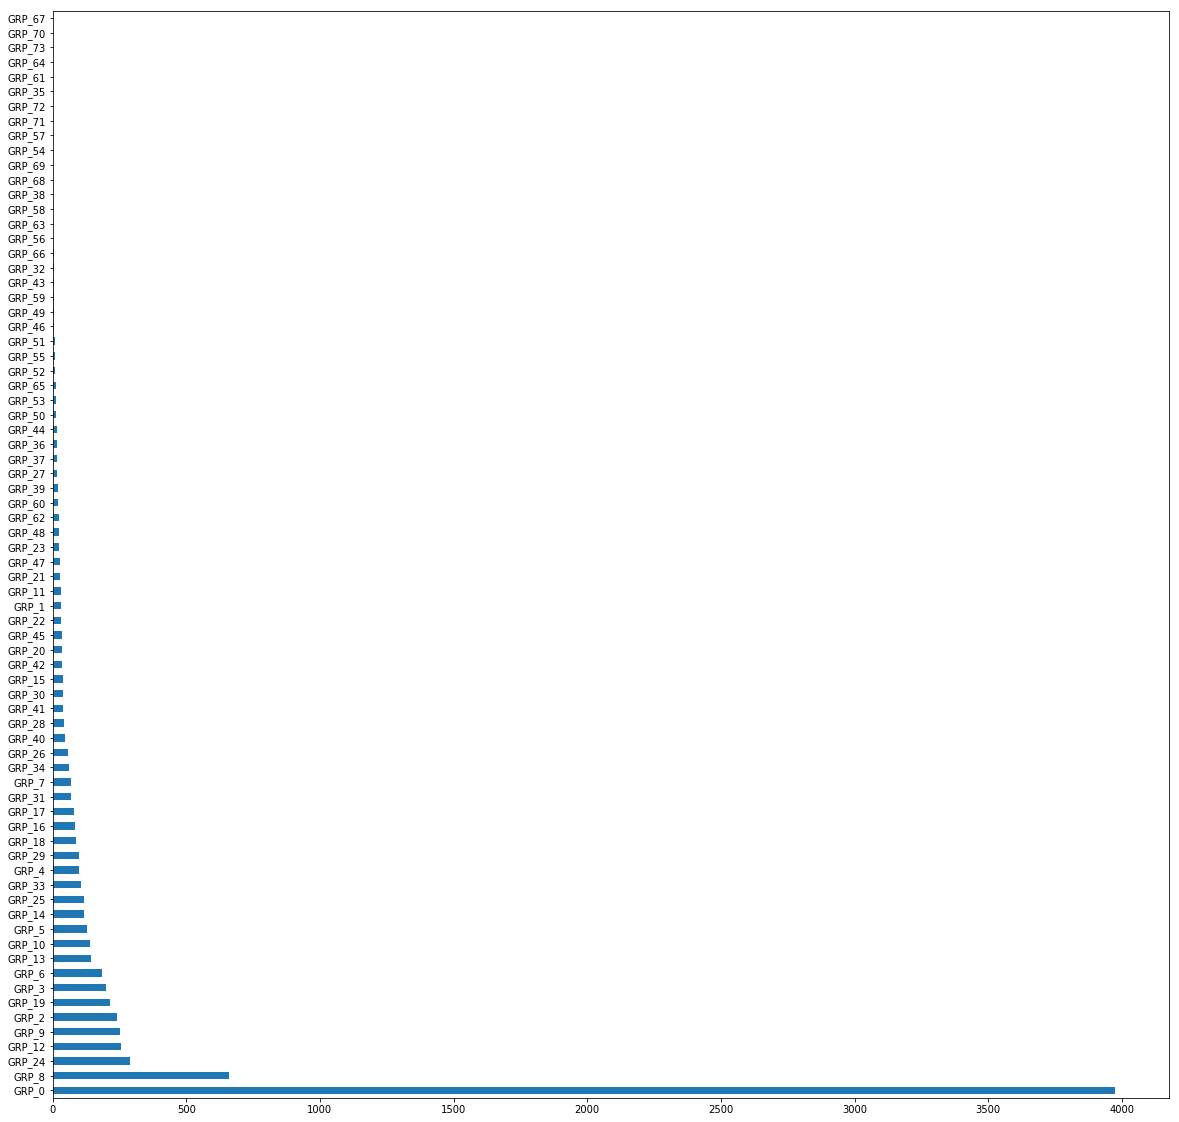

In [10]:
data['Assignment group'].value_counts().plot(kind='barh', figsize=(20,20))

In [12]:
data[data['Assignment group'] == "GRP_0"].count()

Short description    3969
Description          3975
Caller               3976
Assignment group     3976
dtype: int64

### Q. Many of Assignment group have very less datapoints, hence difficult to train these classes. Should we discard  these classes or use Synthetic Data Generation methods like SMOTE to increase the datapoints for those classes ??

In [13]:
(data.isna() == True).sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

### Q. Fill the empty column values with "" ??

In [14]:
(pd.isna(data['Short description']) == True)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8470    False
8471    False
8472    False
8473    False
8474    False
8475    False
8476    False
8477    False
8478    False
8479    False
8480    False
8481    False
8482    False
8483    False
8484    False
8485    False
8486    False
8487    False
8488    False
8489    False
8490    False
8491    False
8492    False
8493    False
8494    False
8495    False
8496    False
8497    False
8498    False
8499    False
Name: Short description, Length: 8500, dtype: bool

### Label Encode the Target Column

In [20]:
from sklearn import preprocessing

In [21]:
le = preprocessing.LabelEncoder()
le.fit(data["Assignment group"])

LabelEncoder()

In [22]:
y_classes = len(le.classes_)

In [23]:
le.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36',
       'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41',
       'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47',
       'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58',
       'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63',
       'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69',
       'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
      dtype=object)

In [24]:
print(y_classes)

74


In [25]:
data["Assignment group"] = le.transform(data["Assignment group"])

In [26]:
data.head(-10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,0
4,skype error,skype error,owlgqjme qhcozdfx,0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,0


### NLP Text Cleaning and Pre-Processing

In [30]:
import re
import nltk
import string

In [31]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [32]:
from nltk.stem.porter import PorterStemmer

In [33]:
#test = data["Short description"]
#print(test)

In [34]:
all_short_descriptions = data["Short description"].values.tolist()

In [35]:
all_short_descriptions

['login issue',
 'outlook',
 'cant log in to vpn',
 'unable to access hr_tool page',
 'skype error ',
 'unable to log in to engineering tool and skype',
 'event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/ ',
 "ticket_no1550391- employment status - new non-employee [enter user's name]",
 'unable to disable add ins on outlook',
 'ticket update on inplant_874773',
 'engineering tool says not connected and unable to submit reports',
 'hr_tool site not loading page correctly',
 'unable to login to hr_tool to sgxqsuojr xwbesorf cards',
 'user wants to reset the password',
 'unable to open payslips ',
 'ticket update on inplant_874743',
 'unable to login to company vpn',
 'when undocking pc , screen will not come back',
 'erp SID_34 account locked',
 'unable to sign into vpn',
 'unable to check payslips',
 'vpn issue',
 'unable to connect to vpn',
 'user called for vendor phone number',
 'vpn not working',
 'erp SID_37 password reset ',
 

In [39]:
len(all_short_descriptions)

8500

In [96]:
processed_all_short_descriptions = list()

In [97]:
# Pre-processing of all short descriptions, making into lowercase, removing punctuations, removing stopwords

for index, desc in enumerate(all_short_descriptions):
    #print(index)
    #print(desc)
    if (pd.isnull(desc)):
        #print(index)
        desc = data.loc[index, 'Description']
        if (pd.isnull(desc)):
            print("Not set", index)
    #tokens = word_tokenize(desc)
    #making into lowercase
    #tokens = [w.lower() for w in tokens]
    # remove punctuations
    #table = str.maketrans('', '', string.punctuation)
    #stripped = [ w.translate(table) for w in tokens]
    # remove the stopwords ....TBD
    #words = ' '.join(stripped)
    processed_all_short_descriptions.append(desc)

In [98]:
len(processed_all_short_descriptions)

8500

In [99]:
processed_all_short_descriptions[0:7]

['login issue',
 'outlook',
 'cant log in to vpn',
 'unable to access hr_tool page',
 'skype error ',
 'unable to log in to engineering tool and skype',
 'event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/ ']

In [100]:
print("Max number of words in a description", max([len(desc) for desc in processed_all_short_descriptions]))

Max number of words in a description 237


In [101]:
max_ticket_desc_length = 250
embedding_dim = 200

In [102]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [103]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_all_short_descriptions)
#tokenizer.fit_on_texts(data)

In [104]:
tokenizer_word_index = tokenizer.word_index

In [108]:
X = tokenizer.texts_to_sequences(processed_all_short_descriptions)

In [109]:
print(X) # Here the tokenizer gives an integer index to each word

[[31, 21], [25], [583, 86, 3, 2, 39], [17, 2, 23, 91, 16, 368], [43, 37], [17, 2, 86, 3, 2, 44, 16, 26, 43], [621, 660, 28, 1585, 27, 89, 15, 703, 41, 3130, 413, 14, 767, 19, 248, 3131], [35, 3132, 1130, 233, 59, 921, 246, 622, 1131, 317], [17, 2, 1307, 157, 3133, 9, 25], [35, 40, 9, 104, 3134], [44, 16, 704, 6, 327, 26, 17, 2, 422, 390], [91, 16, 84, 6, 349, 368, 829], [17, 2, 31, 2, 91, 16, 2, 3135, 3136, 1586], [38, 661, 2, 18, 15, 4], [17, 2, 71, 922], [35, 40, 9, 104, 3137], [17, 2, 31, 2, 27, 39], [117, 3138, 98, 218, 164, 6, 830, 423], [10, 19, 32, 20, 33], [17, 2, 271, 171, 39], [17, 2, 182, 922], [39, 21], [17, 2, 74, 2, 39], [38, 369, 14, 249, 118, 191], [39, 6, 34], [10, 19, 248, 4, 18], [17, 2, 31, 2, 91, 16, 2, 182, 922], [20, 33, 61], [17, 2, 31, 2, 91, 16], [17, 2, 86, 3, 2, 10, 19, 32], [4, 18, 14, 68, 69], [18, 272], [3139, 41, 60, 318], [192, 4, 18], [17, 2, 141, 550, 584], [35, 3140, 1130, 233, 59, 921, 246], [10, 19, 32, 20, 65, 26, 4, 18], [17, 2, 1019, 35, 72, 102

In [110]:
X = pad_sequences(X, maxlen = max_ticket_desc_length)
print(X)

[[   0    0    0 ...    0   31   21]
 [   0    0    0 ...    0    0   25]
 [   0    0    0 ...    3    2   39]
 ...
 [   0    0    0 ...   14 7927 7928]
 [   0    0    0 ... 3105 7929 3106]
 [   0    0    0 ... 7933  108 1236]]


In [111]:
y = np.asarray(data['Assignment group'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8500
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 21]
Number of Labels:  8500
0


In [112]:
print(y)

[ 0  0  0 ...  0 59 44]


In [113]:
print(X.shape)
print(y.shape)

(8500, 250)
(8500,)


In [114]:
vocab_size = len(tokenizer_word_index) + 1 # 1 here is added to reserve padding
print("Vocabulary size : ", vocab_size)

Vocabulary size :  7934


### Creating word embeddings using Glove Embeddings

In [115]:
EMBEDDING_FILE = './glove.6B.200d.txt'

glove_embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    glove_embeddings[word] = embd


In [116]:
len(glove_embeddings)

400000

In [117]:
#glove_embeddings

### Create weight matrix for words in Ticket's Short description using Glove Embeddings

In [118]:
embedding_matrix = np.zeros((vocab_size, embedding_dim) )

In [119]:
for word, i in tokenizer_word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [120]:
embedding_matrix.shape

(7934, 200)

### Create and Compile Model

In [121]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [122]:
model = Sequential()

In [123]:
model.add(Embedding(vocab_size, embedding_dim, weights = [embedding_matrix]))

In [124]:
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25))

In [125]:
model.add(Dense(y_classes, activation='softmax'))

In [126]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         1586800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                29824     
_________________________________________________________________
dense_2 (Dense)              (None, 74)                2442      
Total params: 1,619,066
Trainable params: 1,619,066
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
import tensorflow as tf
y_labels = tf.keras.utils.to_categorical(y, y_classes)

batch_size = 32
epochs = 15

model.fit(X, y_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Train on 6800 samples, validate on 1700 samples
Epoch 1/15
6800/6800 [==============================] - 28s 4ms/sample - loss: 2.5251 - accuracy: 0.5150 - val_loss: 2.3748 - val_accuracy: 0.4794
Epoch 2/15
6800/6800 [==============================] - 26s 4ms/sample - loss: 1.9651 - accuracy: 0.5644 - val_loss: 2.1430 - val_accuracy: 0.5159
Epoch 3/15
6800/6800 [==============================] - 27s 4ms/sample - loss: 1.7245 - accuracy: 0.5913 - val_loss: 1.9794 - val_accuracy: 0.5429
Epoch 4/15
6800/6800 [==============================] - 25s 4ms/sample - loss: 1.5124 - accuracy: 0.6266 - val_loss: 1.8854 - val_accuracy: 0.5724
Epoch 5/15
6800/6800 [==============================] - 25s 4ms/sample - loss: 1.3332 - accuracy: 0.6722 - val_loss: 1.8212 - val_accuracy: 0.5729
Epoch 6/15
6800/6800 [==============================] - 25s 4ms/sample - loss: 1.1639 - accuracy: 0.7122 - val_loss: 1.7811 - val_accuracy: 0.5841
Epoch 7/15
6800/6800 [==============================] - 26s 4ms/sample

In [42]:
import matplotlib.pyplot as plt

import seaborn as sns


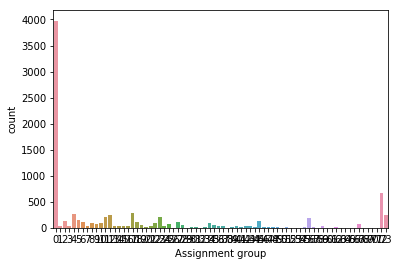

In [43]:
sns.countplot(data['Assignment group'])

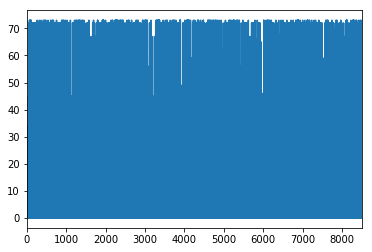

In [44]:
data['Assignment group'].plot()

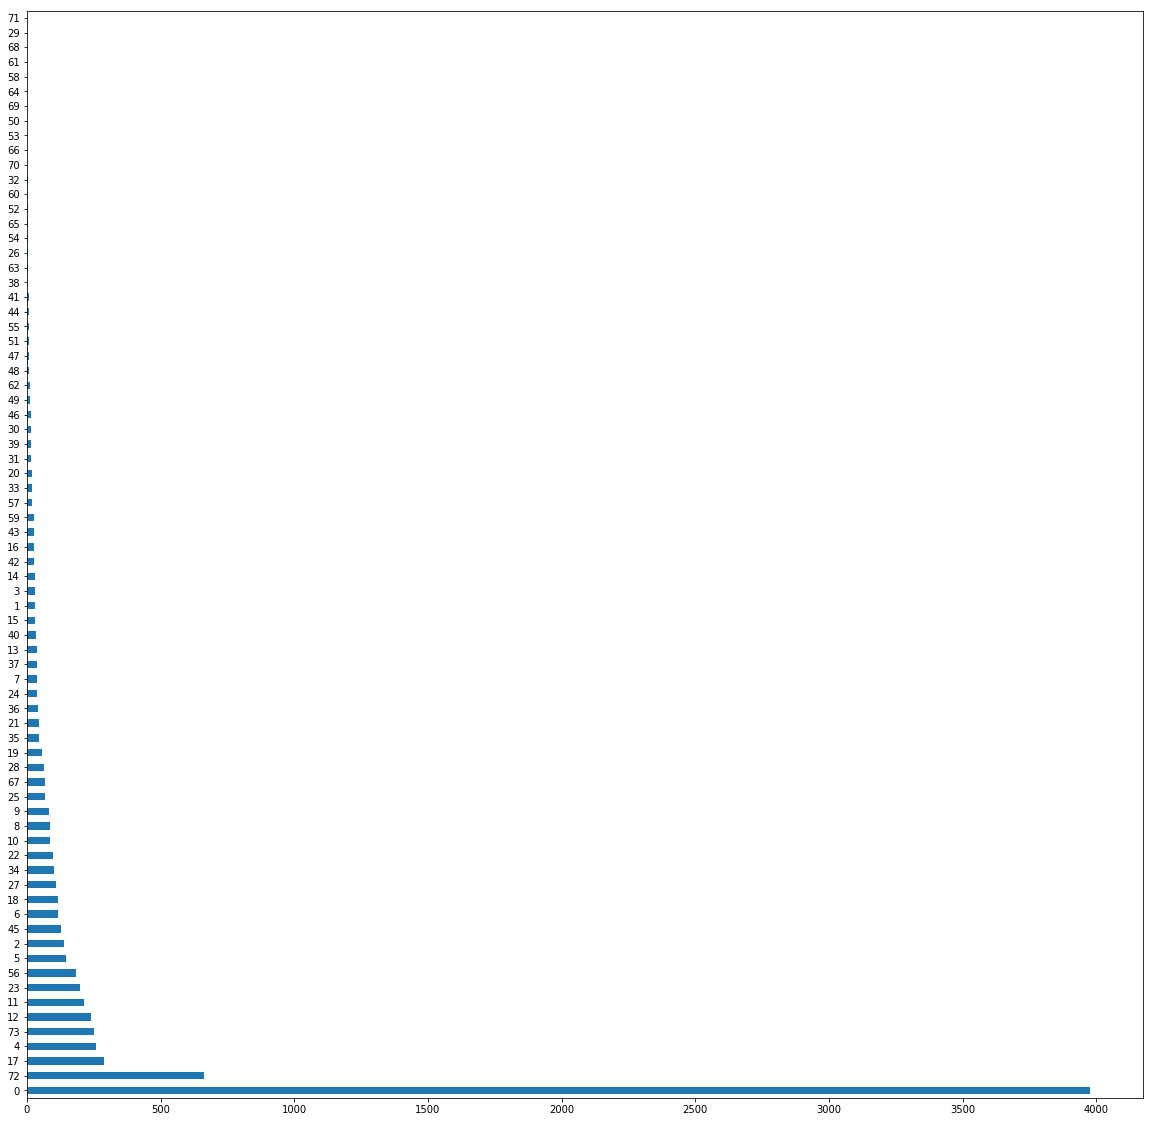

In [180]:
data['Assignment group'].value_counts().plot(kind='barh', figsize=(20,20))